In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
%matplotlib inline

In [2]:
july_trips = pd.read_csv('../data/july_trip.csv')
july_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000


In [3]:
july_trips.companyName.unique()

array(['Bird', 'Lyft', 'Bolt Mobility', 'SPIN', 'Lime', 'Gotcha', 'JUMP'],
      dtype=object)

In [4]:
company_dict = {'Bird':0, 'Lyft': 1, 'Bolt Mobility': 2, 'SPIN': 3, 'Lime': 4, 'Gotcha': 5, 'JUMP': 6}

In [5]:
july_trips.companyName = july_trips.companyName.replace(company_dict)

In [6]:
july_trips.pubTimeStamp = pd.to_datetime(july_trips.pubTimeStamp)
july_trips.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213,0,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213,0,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000


In [7]:
july_trips_scooters = july_trips[['pubTimeStamp','tripRecordNum','tripRoute', 'sumdID', 'tripDuration', 'tripDistance']]

In [8]:
july_trips_scooters.to_pickle("../data/july_trips.pkl")

In [61]:
july_trips_pkl = pd.read_pickle("../data/july_trips.pkl")
july_trips_pkl.head()

,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance
0,2019-07-01 00:02:52.213,BRD5179,"[[36.177438,-86.751861],[36.177425,-86.751987]...",PoweredZSHKJ,2.0,0.0
1,2019-07-01 00:02:52.213,BRD5177,"[[36.162718,-86.771102],[36.162718,-86.771102]]",Powered22JF6,0.0,0.0
2,2019-07-01 00:02:52.213,BRD5176,"[[36.162734,-86.77122],[36.162706,-86.771325],...",Powered22JF6,1.0,0.0
3,2019-07-01 00:02:52.213,BRD5178,"[[36.152499,-86.798708]]",PoweredIB2CC,1.0,0.0
4,2019-07-01 00:02:52.213,BRD5180,"[[36.157523,-86.775794]]",PoweredW4G7R,2.0,0.0


##### Statistics is decision making in the face of uncertainty or variablity

 - GOAL: can we understand the metrics that explain what is the ideal density of available scooters?

### Common descriptive statistics
 - measures of central tendency (mean, median, mode)
 - measures of variability (standard deviation, variance)
 - distribution metrics (quartiles, interquartile range, outliers)

In [10]:
july_trips_pkl['tripDuration'].value_counts()

4.000000     6423
5.000000     6168
3.000000     5900
6.000000     5830
7.000000     5091
             ... 
18.263950       1
55.839800       1
7.425817        1
13.871150       1
27.563217       1
Name: tripDuration, Length: 35772, dtype: int64

In [11]:
july_trips_pkl.describe()

,tripDuration,tripDistance
count,134926.000000,1.349260e+05
mean,97.097264,5.333994e+03
std,1722.548585,1.406051e+05
min,-19.358267,-2.032480e+07
25%,5.000000,3.280840e+02
50%,10.148442,2.956037e+03
75%,21.250550,6.916011e+03
max,512619.000000,3.188448e+07


  What is the mean for `tripDuration` and `tripDistance` ?
 

In [35]:
july_trips_pkl.isnull().sum()

pubTimeStamp     0
tripRecordNum    0
tripRoute        0
sumdID           0
tripDuration     0
tripDistance     0
dtype: int64

In [56]:
scooter_name = july_trips_pkl.tripRecordNum.unique()

In [62]:
scoot_name = pd.DataFrame(scooter_name, columns = ['tripRecordNum'])
print(scoot_name)

      tripRecordNum
0           BRD5179
1           BRD5177
2           BRD5176
3           BRD5178
4           BRD5180
...             ...
50333     LIM824098
50334     LIM824104
50335     LIM824106
50336     LIM824110
50337     LIM824111

[50338 rows x 1 columns]


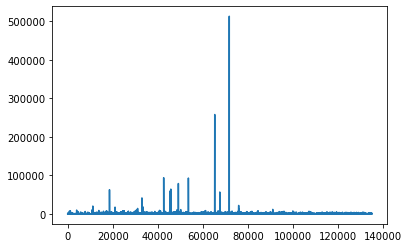

In [65]:
july_trips_pkl.tripDuration.plot();

In [67]:
plt.bar('tripDistance', 'tripDuration', data = july_trips_pkl)
plt.xticks(rotation = 70)
plt.title('stats');

Error in callback <function flush_figures at 0x000002A511FD8820> (for post_execute):


KeyboardInterrupt: 

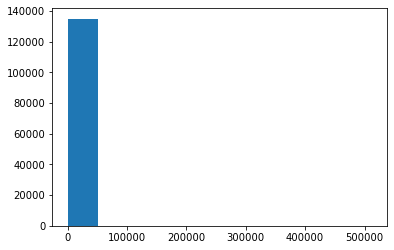

In [71]:
plt.hist('tripDuration', bins = 10, data = july_trips_pkl);

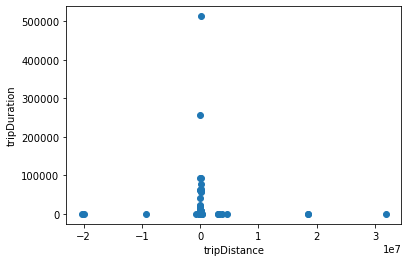

In [73]:
plt.scatter('tripDistance', 'tripDuration', data = july_trips_pkl)
plt.xlabel('tripDistance')
plt.ylabel('tripDuration');